In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
#loading the data
data = pd.read_csv(r"C:\Users\T.B\Downloads\car data.csv")

In [30]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
data.shape

(301, 9)

In [32]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [34]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [35]:
#Encoding the categorical data
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
data.head()

C:\Users\T.B\AppData\Local\Temp\ipykernel_14388\4246810212.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\T.B\AppData\Local\Temp\ipykernel_14388\4246810212.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\T.B\AppData\Local\Temp\ipykernel_14388\4246810212.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. T

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [36]:
# Choosing the features and target variable
X = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data['Selling_Price']


In [37]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# linear regression model
lr = LinearRegression()


In [39]:
#training the model
lr.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
# predicting the test set results
y_pred = lr.predict(X_test)


In [41]:
# evaluating MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.5289272538980834


In [42]:
#Evaluating R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.8468053957654199


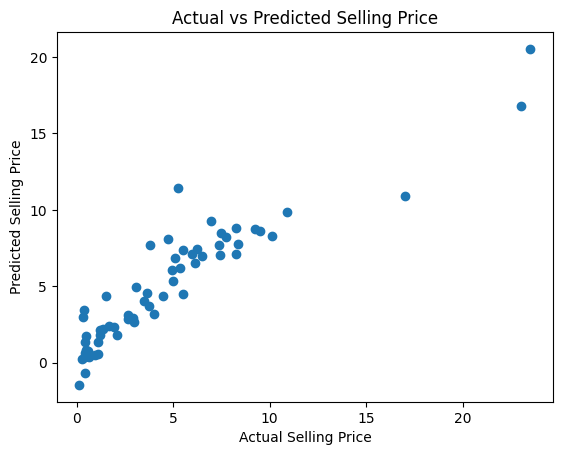

In [43]:
# visualizing the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

In [44]:
#Lasso regression model
lasso = Lasso(alpha=0.1)


In [45]:
#training Lasso regression model
lasso.fit(X_train,y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [46]:
# predicting lasso regression model results
y_pred_lasso = lasso.predict(X_test)


In [47]:
# Evaluating MSE for Lasso regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)

Lasso Regression Mean Squared Error: 3.57569965975745


In [48]:
# Evaluating R2 for Lasso regression
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression R2 Score:", r2_lasso)

Lasso Regression R2 Score: 0.8447749543056788


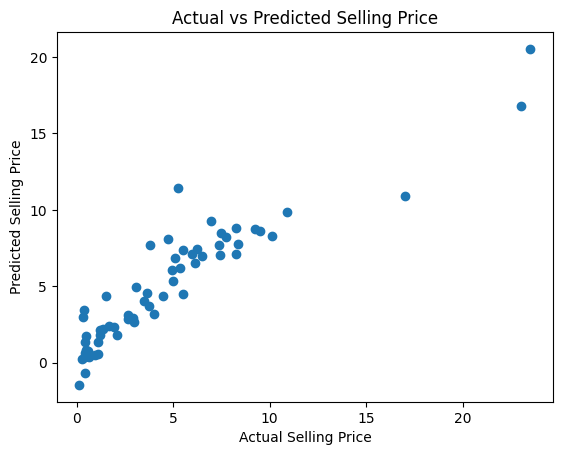

In [49]:
# visualizing the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

In [50]:
#comparing table between linear regression and lasso regression
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression'], 
    'Mean Squared Error': [mse, mse_lasso],
    'R2 Score': [r2, r2_lasso]
})
print(results)

               Model  Mean Squared Error  R2 Score
0  Linear Regression            3.528927  0.846805
1   Lasso Regression            3.575700  0.844775
